**1. Installing and Import Package Required**

In [ ]:
!pip install easyocr
!pip install imutils
!pip install opencv-python-headless==4.7.0.72
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

ERROR: Could not find a version that satisfies the requirement opencv-python-headless==4.1.2.30 (from versions: 3.4.10.37, 3.4.11.39, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.15.55, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.3.0.38, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.4.0.46, 4.5.1.48, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.62, 4.5.5.64, 4.6.0.66, 4.7.0.68, 4.7.0.72)
ERROR: No matching distribution found for opencv-python-headless==4.1.2.30
Looking in indexes: https://download.pytorch.org/whl/cpu


In [10]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

**2. Covert Colored Image into Grayscale Format**

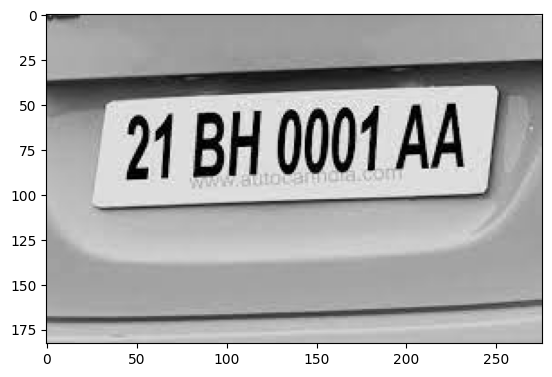

In [161]:
img=cv2.imread('/content/5.jfif')
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

**3. Apply Filter and  Edge Detection**

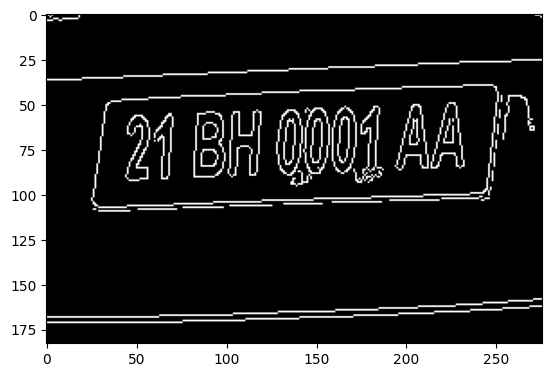

In [162]:
bfilter=cv2.bilateralFilter(gray,11,17,17) #Noise Reduction
edged=cv2.Canny(bfilter,30,200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

**4. Find Contour and Apply Mask**

In [163]:
keypoints=cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours= imutils.grab_contours(keypoints)
contours=sorted(contours,key=cv2.contourArea, reverse=True)[:10]

In [164]:
location=None
for contour in contours:
  approx=cv2.approxPolyDP(contour,10,True)
  if len(approx)==4:
    location=approx
    break


In [165]:
print(location)

[[[251  43]]

 [[ 36  48]]

 [[ 25 103]]

 [[246 100]]]


In [166]:
mask=np.zeros(gray.shape, np.uint8)
new_image=cv2.drawContours(mask,[location],0,255,-1)
new_image=cv2.bitwise_and(img,img,mask=mask)

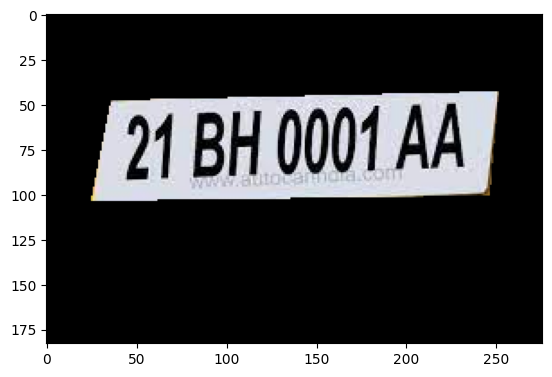

In [167]:
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

In [168]:
(x,y)=np.where(mask==255)
(x1,y1)=(np.min(x), np.min(y))
(x2,y2)=(np.max(x),np.max(y))
cropped_image=gray[x1:x2+1, y1:y2+1]

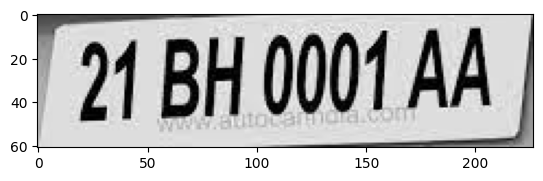

In [169]:
plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB))

**5. Read Text Using Easy OCR**

In [170]:
reader=easyocr.Reader(['en'])
result=reader.readtext(cropped_image)
result

[([[12, 0], [214, 0], [214, 56], [12, 56]],
  '21 BH 0001 AA',
  0.5941505026372795)]

**6. Plot the Result**

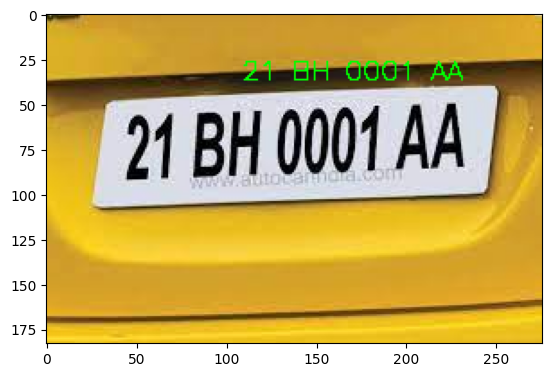

In [171]:
text=result[0][-2]
font=cv2.FONT_HERSHEY_SIMPLEX
res= cv2.putText(img,text=text,org=(approx[1][0][1]+60, approx[1][0][0]) , fontFace=font, fontScale=0.5,color=(0,255,0),thickness=1, lineType=1)
plt.imshow(cv2.cvtColor(res,cv2.COLOR_RGB2BGR))